## Exploratory Data Analysis (EDA)

Example of exploratory data analysis on the Titanic datast.
Demo inspired on https://www.kaggle.com/code/kanncaa1/dataiteam-titanic-eda

**Steps**
* Variable Description
* Univariate Variable Analysis: Categorical and Numerical Variables
* Basic Data Analysis
* Outlier Detection
* Missing Value - find and fill
* Visualization
* Feature engineering
* Modeling

In [ ]:
# Import required libraries

# linear algebra and data processing libraries
import numpy as np
import pandas as pd

# scikit-learn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Graphics Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Utils
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load files
from google.colab import files

# Download the files train_data.csv
# https://www.kaggle.com/code/kanncaa1/dataiteam-titanic-eda/input

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Change names to "titanic_train_data.csv"

Saving titanic_train_data.csv to titanic_train_data.csv
User uploaded file "titanic_train_data.csv" with length 61194 bytes


### Load and Check Data

**Variable Description**
* PassengerId: unique id number to each passenger
* Survived: passenger survive(1) or died(0)
* Pclass: passenger class
* Name: name
* Sex: gender of passenger
* Age: age of passenger
* SibSp: number of siblings/spouses
* Parch: number of parents/children
* Ticket: ticket number
* Fare: amount of money spent on ticket
* Cabin: cabin category
* Embarked: port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)

In [ ]:
# Assuming the titanic.csv file is uploaded to the Colab environment
# Replace 'titanic.csv' with the actual filename if it's different

train_df = pd.read_csv('titanic_train_data.csv')

print("Nr. rows - train: ", len(train_df))

Nr. rows - train:  891


### Variable description

In [ ]:
# Print top examples
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Display basic information about the DataFrame
print(train_df.info())

# Display descriptive statistics for numerical features
print(train_df.describe())

# Display unique values for categorical features
# for column in train_df.columns:
#   if train_df[column].dtype == object:
#     print(f"\nUnique values for {column}:")
#     print(train_df[column].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

### Univariate Variable Analysis - Categorical Variables

In [ ]:
# Get the categorical variables from train_df
categorical_features = [feature for feature in train_df.columns if train_df[feature].dtype == object]
print(categorical_features)

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [ ]:
def bar_plot(variable):
    """
        input: variable ex: "Sex"
        output: bar plot & value count
    """
    # get feature
    var = train_df[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()

    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

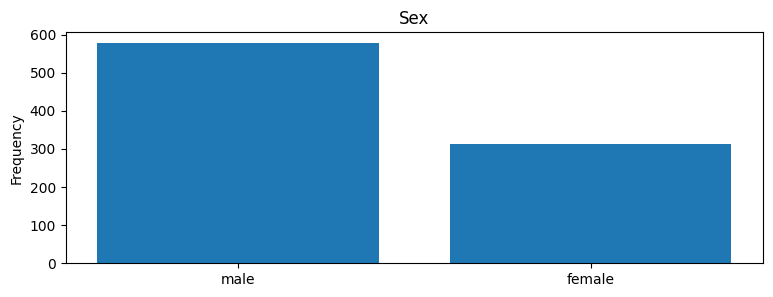

Sex: 
 Sex
male      577
female    314
Name: count, dtype: int64


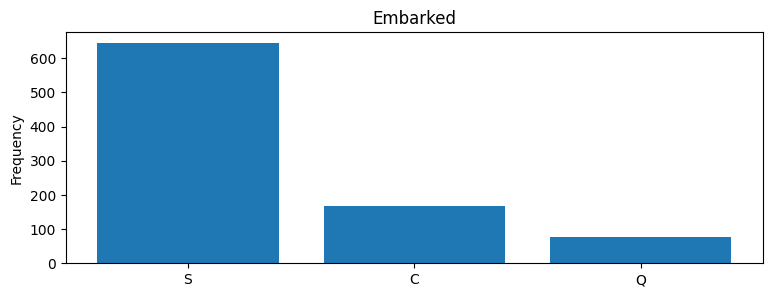

Embarked: 
 Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [ ]:
# Plot categorial_features with less than 10 distinct values
for cf in categorical_features:
  if train_df[cf].nunique() < 10:
    bar_plot(cf)

In [ ]:
# print values for categorial_features with more than 9 distinct values
for cf in categorical_features:
  if train_df[cf].nunique() >= 10:
    print("{} \n".format(train_df[cf].value_counts()))

Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Hewlett, Mrs. (Mary D Kingcome)                        1
Vestrom, Miss. Hulda Amanda Adolfina                   1
Andersson, Mr. Anders Johan                            1
Saundercock, Mr. William Henry                         1
Bonnell, Miss. Elizabeth                               1
Name: count, Length: 891, dtype: int64 

Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877              1
373450              1
STON/O2. 3101282    1
Name: count, Length: 681, dtype: int64 

Cabin
G6             4
C23 C25 C27   

### Univariate Variable Analysis - Numerical variables

In [ ]:
# Visualize frequency and distribution of numerical features
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(train_df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

In [ ]:
# Get the numerical variables from train_df
numerical_features = [feature for feature in train_df.columns if train_df[feature].dtype != object]
print(numerical_features)

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


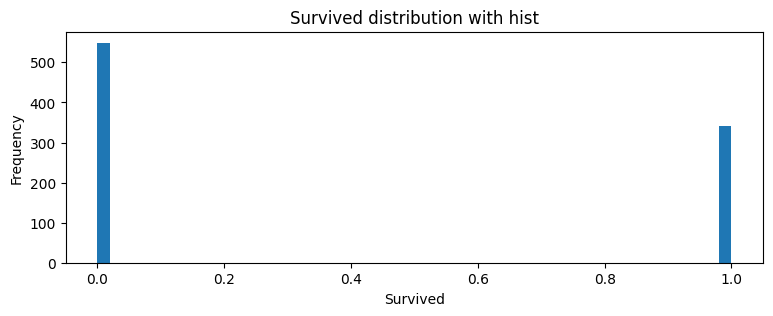

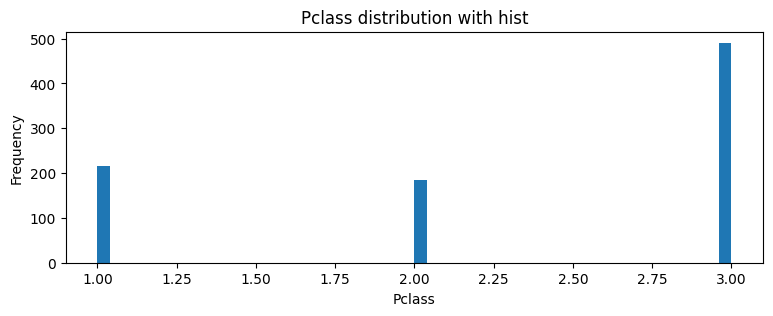

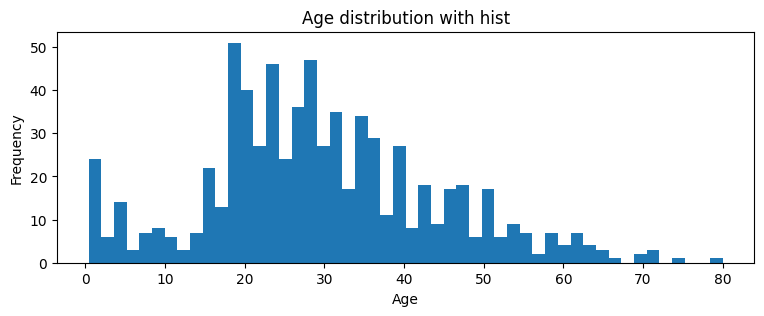

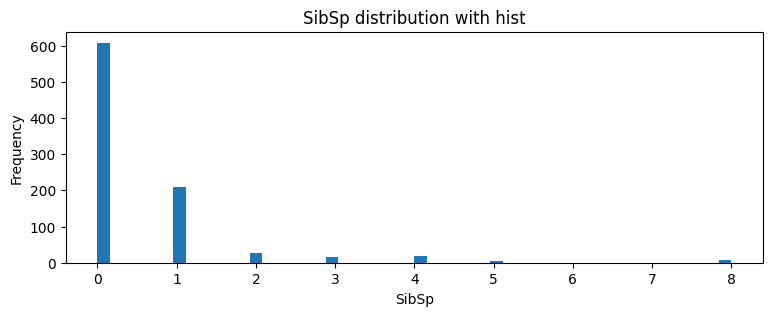

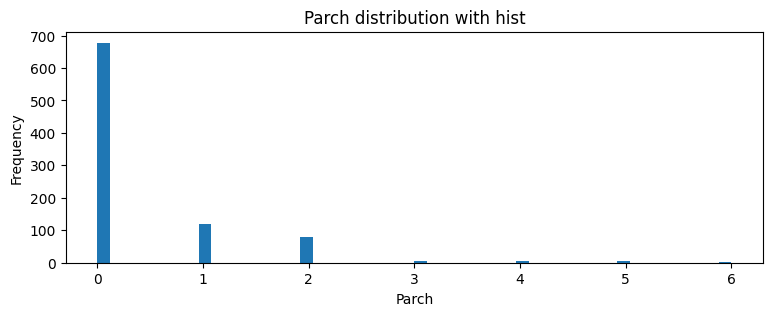

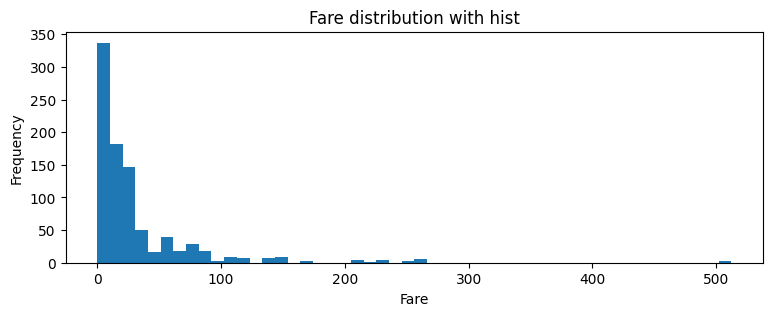

In [ ]:
removed_nf = ["PassengerId"]
for nf in numerical_features:
  if nf not in removed_nf:
    plot_hist(nf)

### Find missing values

In [ ]:
# find age null values
print(f'Age has {train_df["Age"].isnull().sum()} null values')
train_df[train_df["Age"].isnull()].head()

Age has 177 null values


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


### Basic Data Analysis
Bivariate analysis
* Pclass - Survived
* Sex - Survived
* SibSp - Survived
* Parch - Survived

In [ ]:
# Plcass vs Survived
print("Pclass vs Survived")
display(pd.crosstab(train_df['Pclass'], train_df['Survived']))

# Sex vs Survived
print("\nSex vs Survived")
display(pd.crosstab(train_df['Sex'], train_df['Survived']))

# Sibsp vs Survived
print("\nSibSp vs Survived")
display(pd.crosstab(train_df['SibSp'], train_df['Survived']))

# Parch vs Survived
print("\nParch vs Survived")
display(pd.crosstab(train_df['Parch'], train_df['Survived']))

Pclass vs Survived


Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119



Sex vs Survived


Survived,0,1
Sex,,
female,81,233
male,468,109



SibSp vs Survived


Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0



Parch vs Survived


Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


### Visualization

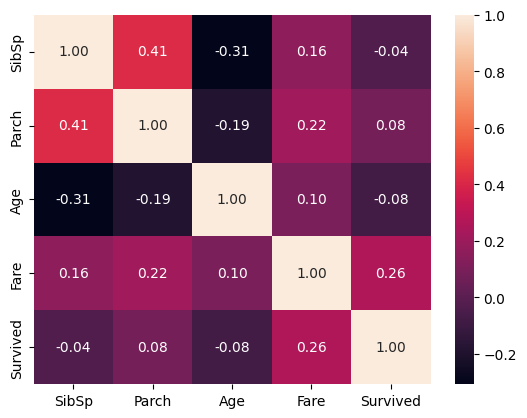

In [ ]:
# Correlation Between Sibsp -- Parch -- Age -- Fare -- Survived
list1 = ["SibSp", "Parch", "Age", "Fare", "Survived"]
sns.heatmap(train_df[list1].corr(), annot = True, fmt = ".2f")
plt.show()

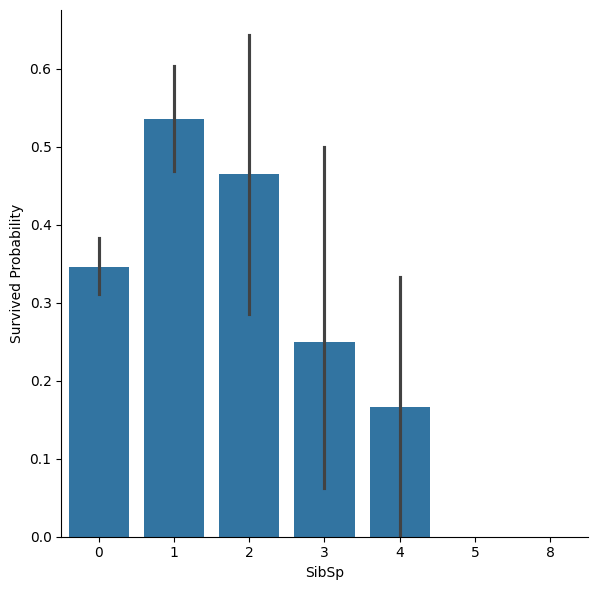

In [ ]:
# SibSp -- Survived
g = sns.catplot(x="SibSp", y="Survived", data=train_df, kind="bar", height=6)
g.set_ylabels("Survived Probability")
plt.show()

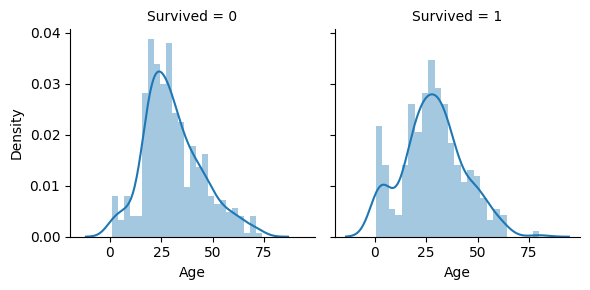

In [ ]:
# age vs survived
g = sns.FacetGrid(train_df, col = "Survived")
g.map(sns.distplot, "Age", bins = 25)
plt.show()

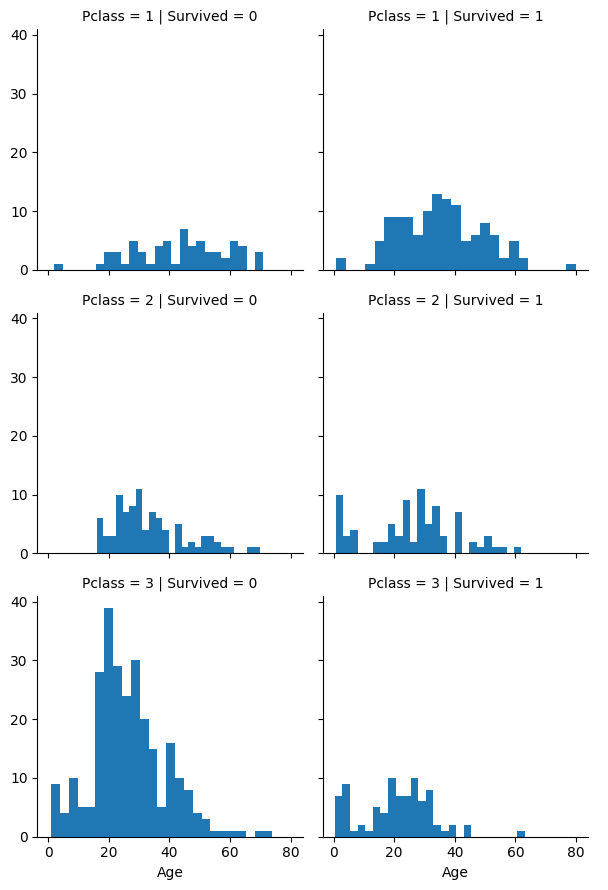

In [ ]:
# Pclass vs survived, age
g = sns.FacetGrid(train_df, col = "Survived", row = "Pclass")
g.map(plt.hist, "Age", bins = 25)
g.add_legend()
plt.show()

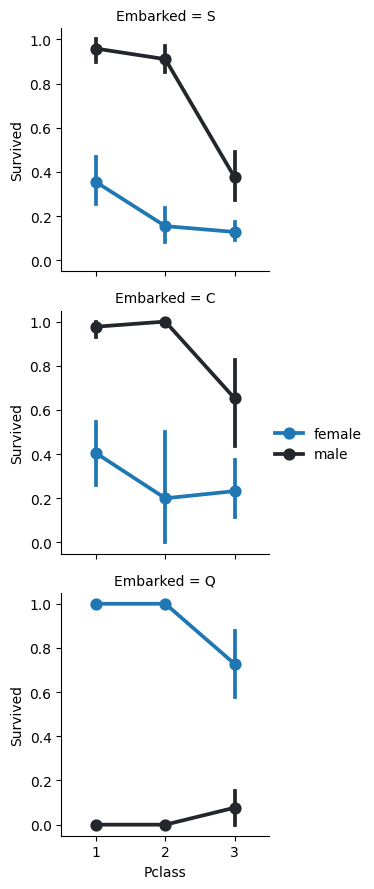

In [ ]:
# Embarked -- Sex -- Pclass -- Survived
g = sns.FacetGrid(train_df, row = "Embarked")
g.map(sns.pointplot, "Pclass","Survived","Sex")
g.add_legend()
plt.show()

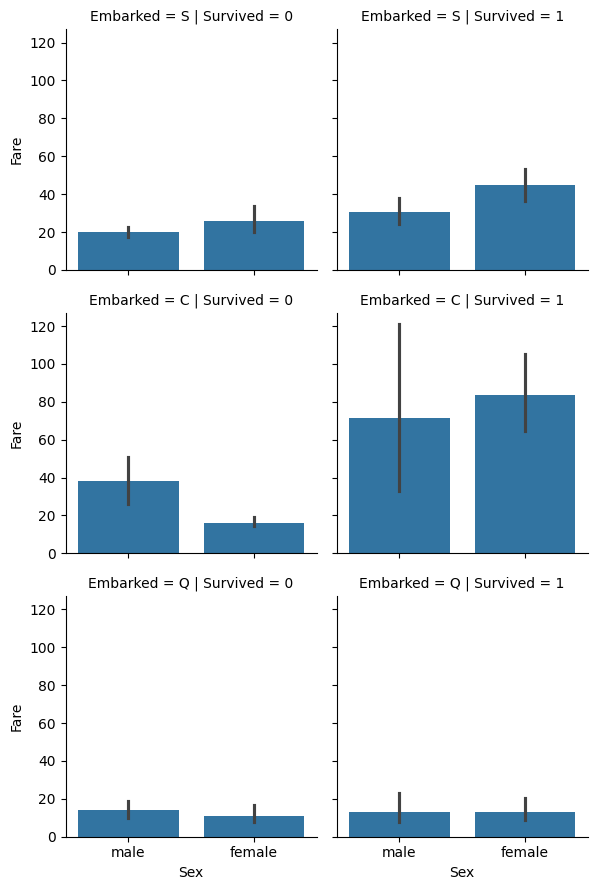

In [ ]:
# Embarked -- Sex -- Fare -- Survived
g = sns.FacetGrid(train_df, row = "Embarked", col = "Survived")
g.map(sns.barplot, "Sex", "Fare")
g.add_legend()
plt.show()

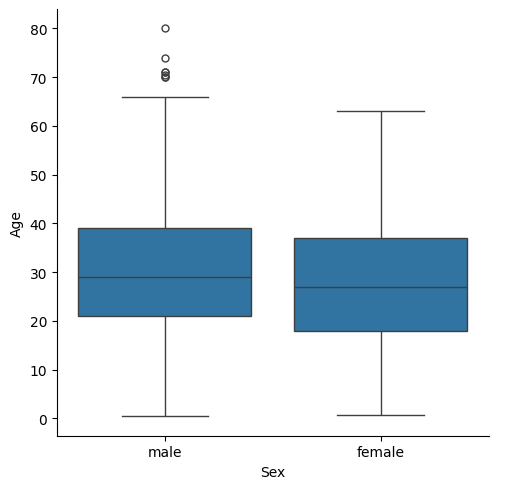

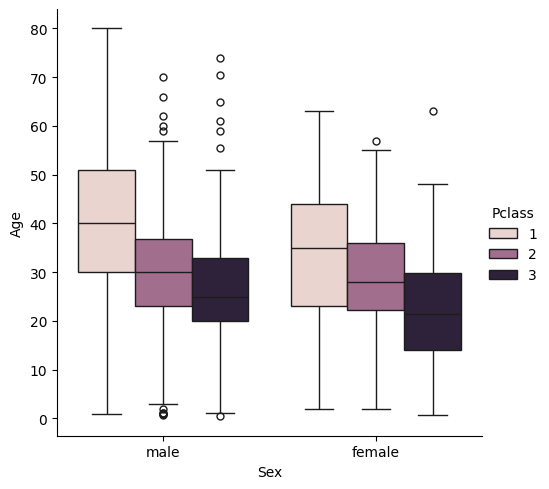

In [ ]:
# sex vs age
sns.catplot(x = "Sex", y = "Age", data = train_df, kind = "box")
# sex vs age vs pclass
sns.catplot(x = "Sex", y = "Age", hue = "Pclass",data = train_df, kind = "box")
# Show
plt.show()

---
# Data preparation

### Find and fill Missing Values

In [ ]:
# get variables with null values
train_df.columns[train_df.isnull().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [ ]:
# list number of null values per variable
train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


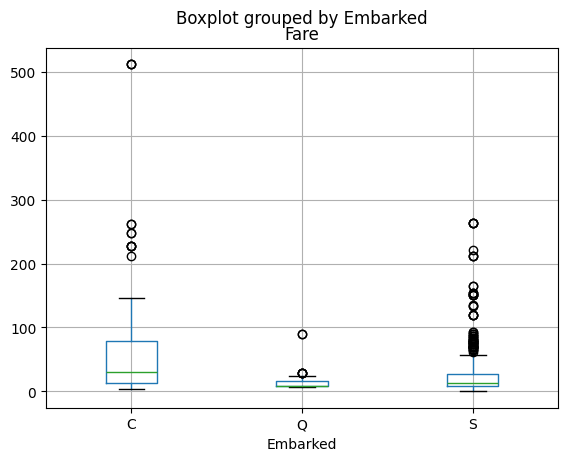

In [ ]:
# check the fare distribution for ports
train_df.boxplot(column="Fare",by = "Embarked")
plt.show()

In [ ]:
# Assign the port to null embarked values according to the data: fare value
train_df["Embarked"] = train_df["Embarked"].fillna("C")
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [ ]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [ ]:
# Assign the fare overall average to the two null values in fare
train_df["Fare"] = train_df["Fare"].fillna(np.mean(train_df[train_df["Pclass"] == 3]["Fare"]))

In [ ]:
# Show the "train_df" row for passengerId 1044

print(train_df[train_df['PassengerId'] == 1044])

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


### Feature Engineering
Usually, the name of the person is not relevant, but the title is:
* extract the title from name
* add title to features
* remove name from features
* Title is not a number -> one-hot encoding

In [ ]:
# Typical names
train_df["Name"].head(10)


,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
5,"Moran, Mr. James"
6,"McCarthy, Mr. Timothy J"
7,"Palsson, Master. Gosta Leonard"
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"
9,"Nasser, Mrs. Nicholas (Adele Achem)"


In [ ]:
# Get title from names
name = train_df["Name"]
train_df["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in name]
train_df["Title"].head(10)

,Title
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
5,Mr
6,Mr
7,Master
8,Mrs
9,Mrs


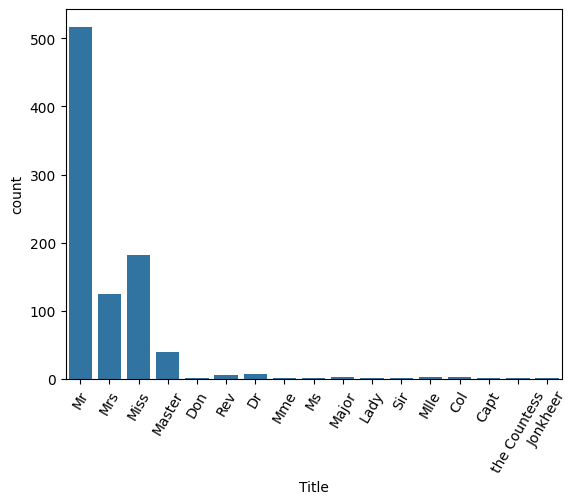

In [ ]:
sns.countplot(x="Title", data = train_df)
plt.xticks(rotation = 60)
plt.show()

In [ ]:
# convert to categorical
train_df["Title"] = train_df["Title"].replace(["Lady","the Countess","Capt","Col","Don","Dr","Major","Rev","Sir","Jonkheer","Dona"],"other")

#train_df["Title"] = [0 if i == "Master" else 1 if i == "Miss" or i == "Ms" or i == "Mlle" or i == "Mrs" else 2 if i == "Mr" else 3 for i in train_df["Title"]]
train_df["Title"] = ["Master" if i == "Master" else "Mrs+" if i == "Miss" or i == "Ms" or i == "Mlle" or i == "Mrs" else "Mr" if i == "Mr" else "other" for i in train_df["Title"]]

train_df["Title"].head(20)

,Title
0,Mr
1,Mrs+
2,Mrs+
3,Mrs+
4,Mr
5,Mr
6,Mr
7,Master
8,Mrs+
9,Mrs+


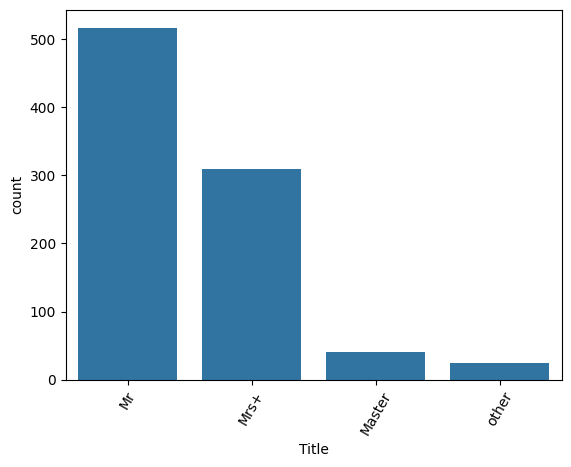

In [ ]:
#
sns.countplot(x="Title", data = train_df)
plt.xticks(rotation = 60)
plt.show()

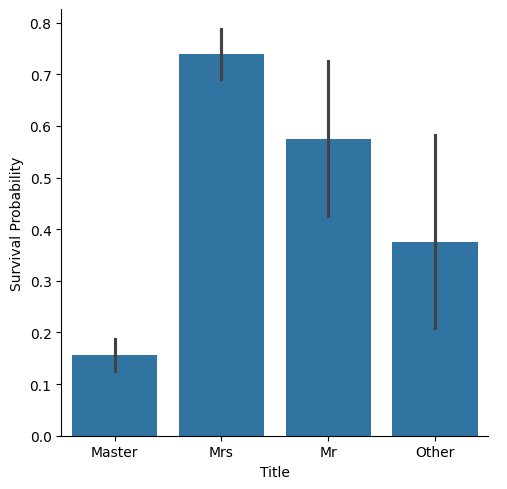

In [ ]:
# Show the probability of survival per title
g = sns.catplot(x = "Title", y = "Survived", data = train_df, kind = "bar")
g.set_xticklabels(["Master","Mrs","Mr","Other"])
g.set_ylabels("Survival Probability")
plt.show()

In [ ]:
# Remove the "name", just keeping the title
train_df.drop(labels = ["Name"], axis = 1, inplace = True)
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs+
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Mrs+
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs+
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [ ]:
# One-hot encoding title
train_df = pd.get_dummies(train_df,columns=["Title"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Mr,Title_Mrs+,Title_other
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,True,False,False
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,False,True,False
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,False,True,False
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,False,False,True,False
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,False,True,False,False


### Outlier Detection using Interquartile Range (IQR)

In [ ]:
# function for finding outliers
def detect_outliers(df,features):
    outlier_indices = []

    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)

    # Define as multiplie outlier those indices that are outlier in more than two features
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)

    return multiple_outliers

In [ ]:
# find outliers
train_df.loc[detect_outliers(train_df,["Age","SibSp","Parch","Fare"])]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Mr,Title_Mrs+,Title_other
27,28,0,1,male,19.0,3,2,19950,263.00,C23 C25 C27,S,False,True,False,False
88,89,1,1,female,23.0,3,2,19950,263.00,C23 C25 C27,S,False,False,True,False
159,160,0,3,male,NaN,8,2,CA. 2343,69.55,NaN,S,True,False,False,False
180,181,0,3,female,NaN,8,2,CA. 2343,69.55,NaN,S,False,False,True,False
201,202,0,3,male,NaN,8,2,CA. 2343,69.55,NaN,S,False,True,False,False
324,325,0,3,male,NaN,8,2,CA. 2343,69.55,NaN,S,False,True,False,False
341,342,1,1,female,24.0,3,2,19950,263.00,C23 C25 C27,S,False,False,True,False
792,793,0,3,female,NaN,8,2,CA. 2343,69.55,NaN,S,False,False,True,False
846,847,0,3,male,NaN,8,2,CA. 2343,69.55,NaN,S,False,True,False,False
863,864,0,3,female,NaN,8,2,CA. 2343,69.55,NaN,S,False,False,True,False


In [ ]:
# drop outliers
# train_df = train_df.drop(detect_outliers(train_df,["Age","SibSp","Parch","Fare"]),axis = 0).reset_index(drop = True)

### Outlier Detection using DBScan algorithm

In [ ]:
# Select numerical features and handle missing values, then scale the data using `StandardScaler`.
selected_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Title_Master', 'Title_Mr', 'Title_Mrs+', 'Title_other']
df_dbscan = train_df[selected_features].copy()

# Impute missing 'Age' values with the median
median_age = df_dbscan['Age'].median()
df_dbscan['Age'].fillna(median_age, inplace=True)

# Instantiate and apply StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_dbscan)

print("DataFrame for DBSCAN created, 'Age' missing values imputed, and features scaled.")
print("Shape of scaled_features:", scaled_features.shape)


DataFrame for DBSCAN created, 'Age' missing values imputed, and features scaled.
Shape of scaled_features: (891, 9)


In [ ]:
# original parameters: eps=0.5, min_samples=5
dbscan = DBSCAN(eps=2, min_samples=3)
clusters = dbscan.fit_predict(scaled_features)

# Identify outliers (cluster label -1)
outliers_indices = df_dbscan[clusters == -1].index

# print the number of outliers found
print(f"Number of outliers detected by DBSCAN: {len(outliers_indices)}")

# print the 10 first outliers
if not outliers_indices.empty:
    display(train_df.loc[outliers_indices].head(10))
else:
    print("No outliers detected with current DBSCAN parameters.")

Number of outliers detected by DBSCAN: 8
Outliers (first 5 rows if any):


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Mr,Title_Mrs+,Title_other
13,14,0,3,male,39.0,1,5,347082,31.2750,NaN,S,False,True,False,False
27,28,0,1,male,19.0,3,2,19950,263.0000,C23 C25 C27,S,False,True,False,False
159,160,0,3,male,NaN,8,2,CA. 2343,69.5500,NaN,S,True,False,False,False
258,259,1,1,female,35.0,0,0,PC 17755,512.3292,NaN,C,False,False,True,False
360,361,0,3,male,40.0,1,4,347088,27.9000,NaN,S,False,True,False,False
438,439,0,1,male,64.0,1,4,19950,263.0000,C23 C25 C27,S,False,True,False,False
679,680,1,1,male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,False,True,False,False
737,738,1,1,male,35.0,0,0,PC 17755,512.3292,B101,C,False,True,False,False
